<img class="progressiveMedia-image js-progressiveMedia-image" data-src="https://cdn-images-1.medium.com/max/1500/1*FB6fOzH3Fe3VP2NsHqULrg.jpeg" src="https://cdn-images-1.medium.com/max/1500/1*FB6fOzH3Fe3VP2NsHqULrg.jpeg">

conda install scikit-learn

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [12]:
df_ecom = pd.read_csv('EcommerceCustomers.csv')

In [13]:
df_ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
'''
Email (Customer’s email id)
Address (Customer’s home address)
Avatar (Colour selected by customer on their member profile)
Average session length (Minutes spent by customer on average for each in-store session)
Time on App (Minutes spent by customer on the app)
Time on Website (Minutes spent by customer on the website)
Length of Membership (Years the customer has been with Natalie’s)
Yearly Amount Spent (Money spent yearly by customer on Natalie’s)
'''

'\nEmail (Customer’s email id)\nAddress (Customer’s home address)\nAvatar (Colour selected by customer on their member profile)\nAverage session length (Minutes spent by customer on average for each in-store session)\nTime on App (Minutes spent by customer on the app)\nTime on Website (Minutes spent by customer on the website)\nLength of Membership (Years the customer has been with Natalie’s)\nYearly Amount Spent (Money spent yearly by customer on Natalie’s)\n'

In [15]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [16]:
df_ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


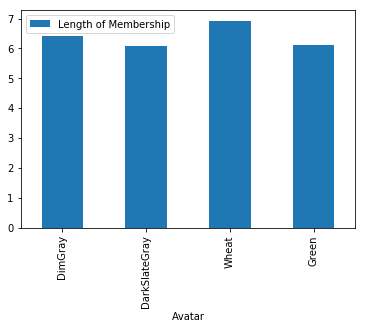

In [29]:
df_ecom.loc[df_ecom['Length of Membership'] > 6].plot.bar(x='Avatar',y='Length of Membership')

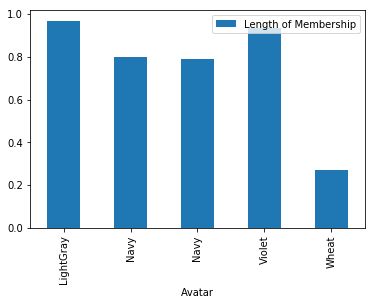

In [28]:
df_ecom.loc[df_ecom['Length of Membership'] < 1].plot.bar(x='Avatar',y='Length of Membership')

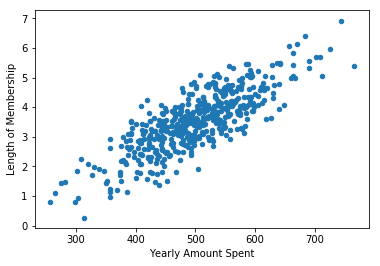

In [32]:
df_ecom.plot.scatter(x='Yearly Amount Spent',y='Length of Membership')

Training data and test data
Our ultimate goal for Natalie’s is to boost the yearly amount spent for each customer, so we can use that feature as the dependent variable y for our regression. The other numeric columns will make up the set of independent variables X.

In [55]:
X = df_ecom[['Time on App', 'Time on Website', 'Length of Membership']] 
y = df_ecom[['Yearly Amount Spent']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
X_train

,Time on App,Time on Website,Length of Membership
202,11.340036,37.039514,3.811248
428,14.039867,37.022269,3.738225
392,11.514949,37.128039,4.662845
86,12.517666,37.151921,2.669942
443,12.504220,37.645839,4.051382
398,11.568527,38.918749,4.082855
449,12.594194,37.683875,2.571778
321,12.968893,37.333107,3.229451
109,13.452129,38.503009,3.318822
93,13.664748,37.724386,1.362674


In [74]:
X_test.shape

(150, 3)

In [57]:
lm = LinearRegression()

In [58]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
lm.coef_

array([[36.74667786,  1.07348102, 62.10453279]])

In [60]:
predictions = lm.predict(X_test)

In [73]:
print(predictions.shape)

(150, 1)


Text(0, 0.5, 'Predicted Y')

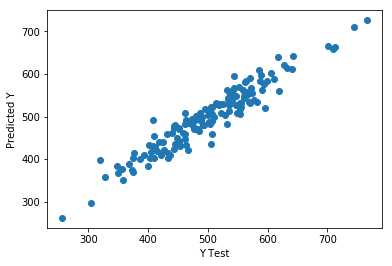

In [61]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [62]:
coeffs = pd.DataFrame(data=lm.coef_.transpose(), index=X.columns, columns=['Coefficient'])

In [63]:
coeffs

,Coefficient
Time on App,36.746678
Time on Website,1.073481
Length of Membership,62.104533


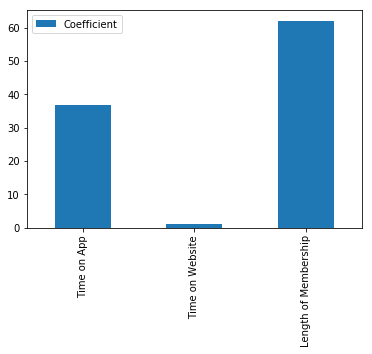

In [64]:
coeffs.plot.bar()

In [88]:
x_new_values   = np.array([[10,120,5]])
y_new_value    = lm.predict(x_new_values)


print('If the Time on App is ', x_new_values[0][0], 
      '\nand the Time on Website is', x_new_values[0][1],
      '\nand the Length of Membership (customer loyaty) is ', x_new_values[0][2],
      '\nThe predicted Yearly Amount Spent is: ', y_new_value[0][0])

If the Time on App is  10 
and the Time on Website is 120 
and the Length of Membership (customer loyaty) is  5 
The predicted Yearly Amount Spent is:  603.5412755714251


### References

#### https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#### https://medium.com/tensorist/making-e-commerce-business-decisions-using-scikit-learn-2dd1d76ab675